In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import get_cmap
from scipy.optimize import curve_fit

plt.style.use('pablet')

In [156]:
data= pd.read_csv('data.csv', sep=',', skiprows=1)
data.head()

z= data['z']
stellarM= np.asarray(data['stellarM'])
SFR= np.asarray(data['SFR'])
OH= np.asarray(data['OH'])
print('z:', min(z), max(z))
print('M*:', min(stellarM), max(stellarM))
print('SFR:', min(SFR), max(SFR))
print('OH:', min(OH), max(OH))
print('Sample:', len(z))

z: 0.005001906 0.2999596
M*: 6.015986 12.49228
SFR: -1.998994 1.999063
OH: 7.67 9.469999
Sample: 202615


In [157]:
def fit(x, a, b, c):
    return a+b*x+c*x**2

[-2.07301062  1.92129137 -0.08224384]


(8.0, 9.5)

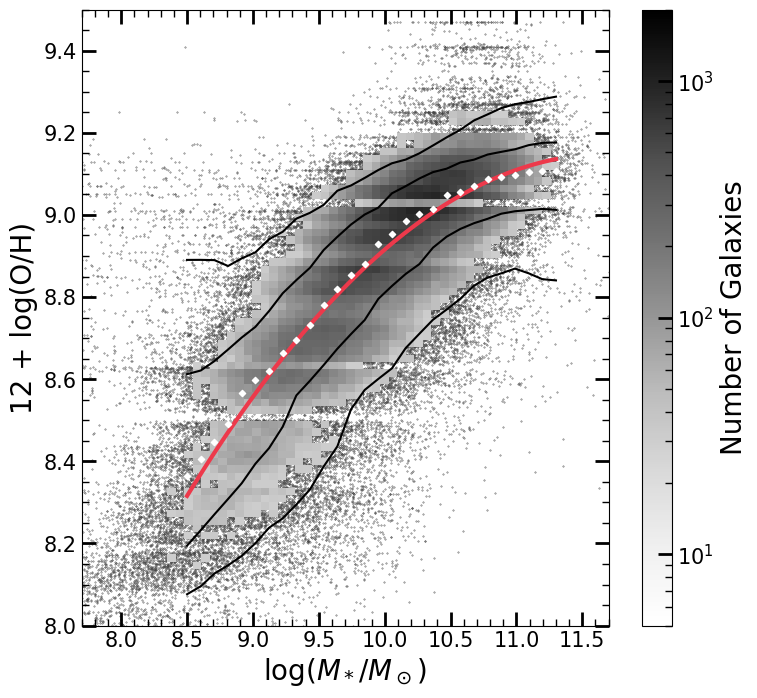

In [158]:
hist, x, y= np.histogram2d(stellarM, OH, bins=100)

plt.figure(figsize=(8.5, 8))
plt.scatter(stellarM, OH, color='#444444', s=0.1)
plt.xlabel(f'log($M_*/M_\odot$)')
plt.ylabel(f'12 + log(O/H)')
plt.xlim(7.7, 11.7)
plt.ylim(8, 9.5)

hist_masked= np.copy(hist)
hist_masked[hist_masked<30] = np.nan

pcm= plt.pcolormesh(x, y, hist_masked.T, cmap='Greys', norm=mcolors.LogNorm(vmin=5, vmax=2e3))
cbar= plt.colorbar(pcm, label='Number of Galaxies')


mask= np.where((stellarM>8.5)*(stellarM<11.3))
p2_5= []
p16= []
p50= []
p84= []
p97_5= []

a=8.45
b=8.65
for i in range(28):
    mask2= np.where((stellarM>a)*(stellarM<b))
    p2_5.append(np.percentile(OH[mask2], 2.5))
    p16.append(np.percentile(OH[mask2], 16))
    p50.append(np.percentile(OH[mask2], 50))
    p84.append(np.percentile(OH[mask2], 84))
    p97_5.append(np.percentile(OH[mask2], 97.5))
    a+=0.1
    b+=0.1

#fit
popt, _= curve_fit(fit, stellarM[mask], OH[mask])
A= popt[0]
B= popt[1]
C= popt[2]
print(popt)
m= np.linspace(8.5, 11.3, 100)
plt.plot(m, fit(m, A, B, C), c='#ed394b', lw=3, zorder=1)

#1 and 2 sigma
mass_contours= np.linspace(8.5, 11.3, 28)
plt.plot(mass_contours, p2_5, c='k')
plt.plot(mass_contours, p16, c='k')
plt.scatter(mass_contours, p50, c='w', marker='D', s=10, zorder=2)
plt.plot(mass_contours, p84, c='k')
plt.plot(mass_contours, p97_5, c='k')

plt.xlabel(f'log($M_*/M_\odot$)')
plt.ylabel(f'12 + log(O/H)')
plt.xlim(7.7, 11.7)
plt.ylim(8, 9.5)


[-2.07301062  1.92129137 -0.08224384]


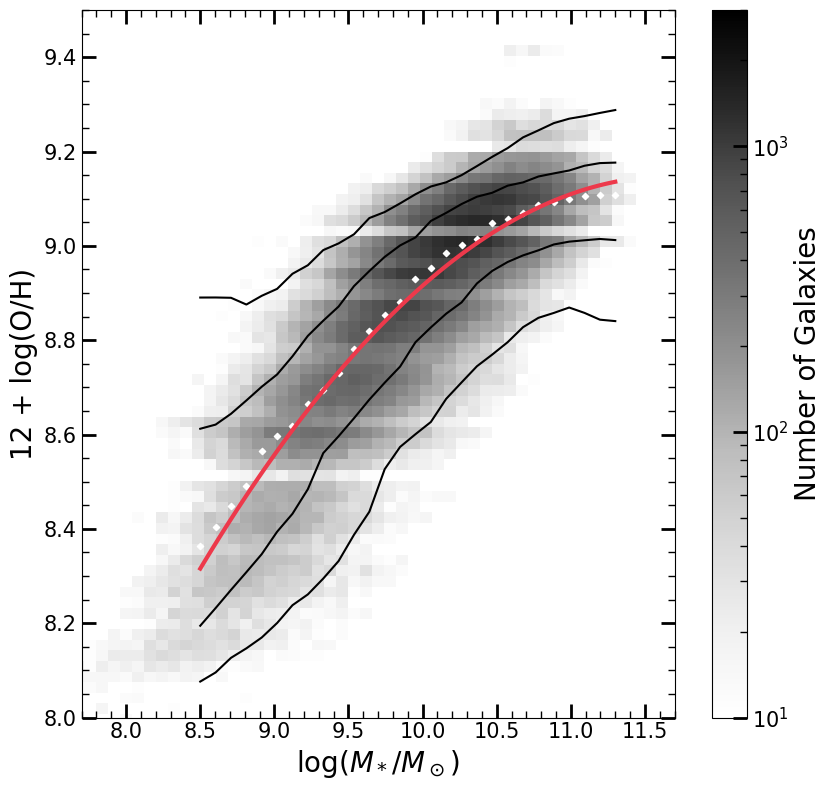

In [159]:
mask2= np.where((stellarM>8.5)*(stellarM<11.3))

plt.figure(figsize=(8.5, 8))

p2_5= []
p16= []
p50= []
p84= []
p97_5= []

a=8.45
b=8.65
for i in range(28):
    mask= np.where((stellarM>a)*(stellarM<b))
    p2_5.append(np.percentile(OH[mask], 2.5))
    p16.append(np.percentile(OH[mask], 16))
    p50.append(np.percentile(OH[mask], 50))
    p84.append(np.percentile(OH[mask], 84))
    p97_5.append(np.percentile(OH[mask], 97.5))
    a+=0.1
    b+=0.1

#fit
popt, _= curve_fit(fit, stellarM[mask2], OH[mask2])
A= popt[0]
B= popt[1]
C= popt[2]
print(popt)
m= np.linspace(8.5, 11.3, 100)
plt.plot(m, fit(m, A, B, C), c='#ed394b', lw=3)

#2dhist
h= plt.hist2d(stellarM, OH, bins=80, cmap='Greys', norm=mcolors.LogNorm())
cbar= plt.colorbar(h[3], label='Number of Galaxies')
h[3].set_clim(10, 3e3)

#1 and 2 sigma
mass_contours= np.linspace(8.5, 11.3, 28)
plt.plot(mass_contours, p2_5, c='k')
plt.plot(mass_contours, p16, c='k')
plt.scatter(mass_contours, p50, c='w', marker='D', s=10)
plt.plot(mass_contours, p84, c='k')
plt.plot(mass_contours, p97_5, c='k')

plt.xlabel(f'log($M_*/M_\odot$)')
plt.ylabel(f'12 + log(O/H)')
plt.xlim(7.7, 11.7)
plt.ylim(8, 9.5)

plt.tight_layout()
plt.show()


[-2.07301062  1.92129137 -0.08224384]


/var/folders/tq/v61_thw53_d2qxd50zxns3xr0000gn/T/ipykernel_39675/4162070499.py:5: RuntimeWarning: invalid value encountered in divide
  SFR_mean= np.divide(SFR_sum, SFR_count, out=np.zeros_like(SFR_sum))
/var/folders/tq/v61_thw53_d2qxd50zxns3xr0000gn/T/ipykernel_39675/4162070499.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(stellarM, OH, c=SFR, cmap=get_cmap('twilight_shifted').reversed(), s=0.1)
/var/folders/tq/v61_thw53_d2qxd50zxns3xr0000gn/T/ipykernel_39675/4162070499.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  pcm= plt.pcolormesh(x, y, SFR_mean.T, cmap=get_cmap('twilight_shifted').reversed(), vmin=-2, vma

(8.0, 9.5)

<Figure size 1200x700 with 0 Axes>

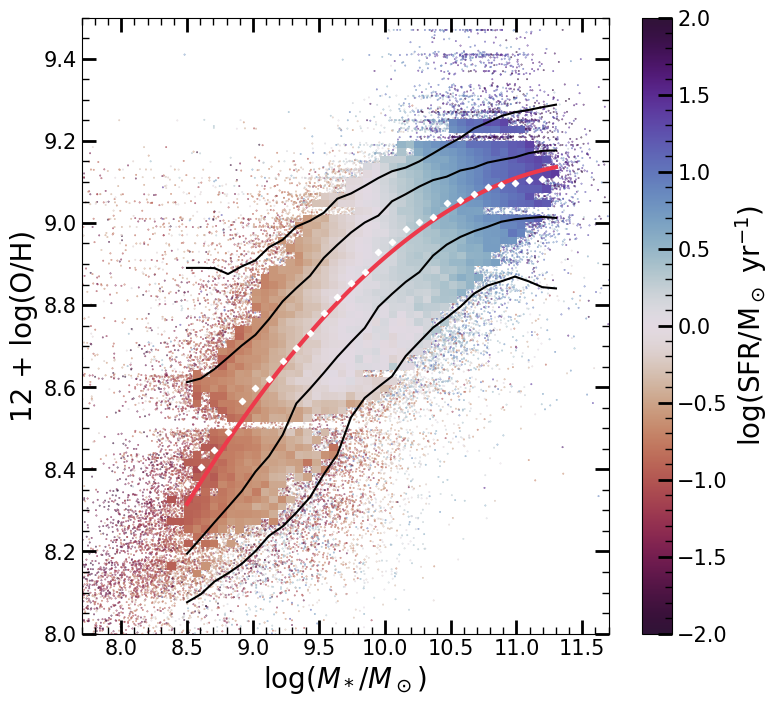

In [160]:
hist, x, y= np.histogram2d(stellarM, OH, bins=100)

SFR_sum, _, _= np.histogram2d(stellarM, OH, bins=[x, y], weights=SFR)
SFR_count, _, _= np.histogram2d(stellarM, OH, bins=[x, y])
SFR_mean= np.divide(SFR_sum, SFR_count, out=np.zeros_like(SFR_sum))
SFR_mean[SFR_count<30]= np.nan
plt.clf()

plt.figure(figsize=(8.5, 8))
plt.scatter(stellarM, OH, c=SFR, cmap=get_cmap('twilight_shifted').reversed(), s=0.1)
plt.xlabel(f'log($M_*/M_\odot$)')
plt.ylabel(f'12 + log(O/H)')
plt.xlim(7.7, 11.7)
plt.ylim(8, 9.5)

hist_masked= np.copy(hist)
hist_masked[hist_masked<30]= np.nan

pcm= plt.pcolormesh(x, y, SFR_mean.T, cmap=get_cmap('twilight_shifted').reversed(), vmin=-2, vmax=2)
cbar= plt.colorbar(pcm, label=r'log(SFR/M$_\odot$ yr$^{-1}$)')


mask2= np.where((stellarM>8.5)*(stellarM<11.3))

p2_5= []
p16= []
p50= []
p84= []
p97_5= []

a=8.45
b=8.65
for i in range(28):
    mask= np.where((stellarM>a)*(stellarM<b))
    p2_5.append(np.percentile(OH[mask], 2.5))
    p16.append(np.percentile(OH[mask], 16))
    p50.append(np.percentile(OH[mask], 50))
    p84.append(np.percentile(OH[mask], 84))
    p97_5.append(np.percentile(OH[mask], 97.5))
    a+=0.1
    b+=0.1

#fit
popt, _ = curve_fit(fit, stellarM[mask2], OH[mask2])
A= popt[0]
B= popt[1]
C= popt[2]
print(popt)
m= np.linspace(8.5, 11.3, 100)
plt.plot(m, fit(m, A, B, C), c='#ed394b', lw=3, zorder=1)

#1 and 2 sigma
mass_contours= np.linspace(8.5, 11.3, 28)
plt.plot(mass_contours, p2_5, c='k')
plt.plot(mass_contours, p16, c='k')
plt.scatter(mass_contours, p50, c='w', marker='D', s=10, zorder=2)
plt.plot(mass_contours, p84, c='k')
plt.plot(mass_contours, p97_5, c='k')

plt.xlim(7.7, 11.7)
plt.ylim(8, 9.5)


/var/folders/tq/v61_thw53_d2qxd50zxns3xr0000gn/T/ipykernel_39675/3933976453.py:4: RuntimeWarning: invalid value encountered in divide
  SFR_mean = np.divide(SFR_sum, SFR_count, out=np.zeros_like(SFR_sum))


<Figure size 1200x700 with 0 Axes>

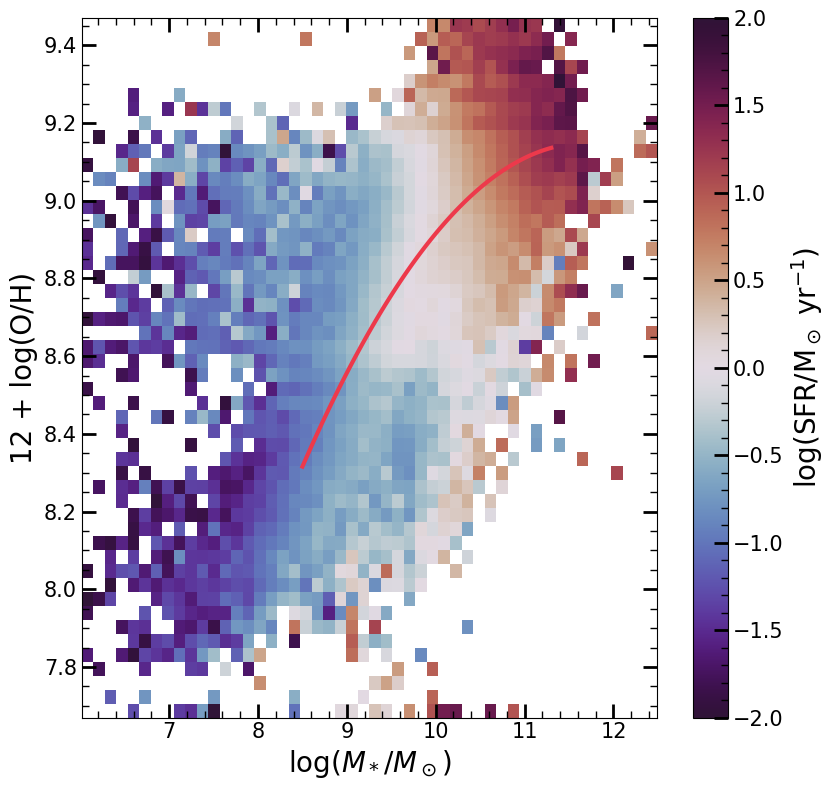

In [161]:
h, x, y, _= plt.hist2d(stellarM, OH, bins=50)
SFR_sum, _, _ = np.histogram2d(stellarM, OH, bins=[x, y], weights=SFR)
SFR_count, _, _ = np.histogram2d(stellarM, OH, bins=[x, y])
SFR_mean = np.divide(SFR_sum, SFR_count, out=np.zeros_like(SFR_sum))
plt.clf()

plt.figure(figsize=(8.5, 8))

#SFR colorbar
mesh= plt.pcolormesh(x, y, SFR_mean.T, cmap='twilight_shifted', vmin=-2, vmax=2)
cbar= plt.colorbar(mesh, label='log(SFR/M$_\odot$ yr$^{-1}$)')
plt.plot(m, fit(m, A, B, C), c='#ed394b', lw=3)

plt.xlabel(f'log($M_*/M_\odot$)')
plt.ylabel(f'12 + log(O/H)')
plt.tight_layout()
plt.show()

